# **Deep Reinforcement Learning Class Spring 2025 Assignment 1**

In this assignment, we will learn about gym interface, gridworld, q-learning, and etc. You will need to fill in the missing code snippets (marked by TODO).

Make a copy of this notebook using File > Save a copy in Drive and edit it with your answers.

WARNING: Do not put your name or any other personal identification information in this notebook.

# **Question 1:** Implement and Familiarize Yourself with a Grid World Environment
We will first become familiar with the grid world environment.

In this question, you need to implement a simple 3×3 grid world from scratch. Specifically, you should define functions such as reset(), step(), and render().

Additionally, you should explore and gain familiarity with MiniGrid in OpenAI Gym.

To define your GridWorldEnv.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

class GridWorldEnv:
    def __init__(self, size=5):
        """
        ✅ Grid World Environment
        - `size`: Grid size (default 5x5)
        - `agent_pos`: Initial position (0,0)
        - `goal_pos`: Goal position (size-1, size-1)
        - `reward`: +1 for reaching the goal, -0.1 per step
        """
        self.size = size
        self.agent_pos = [0, 0]  # Start position
        self.goal_pos = [size - 1, size - 1]  # Goal position
        self.done = False

    def reset(self):
        """
        ✅ Reset the environment
        - Reset `agent_pos` to (0,0)
        - Set `done` to False
        - Return the initial state
        """
        # TODO: Reset the agent's position to (0,0)
        agent_pos = [0, 0]

        # TODO: Set `done` to False
        done = False

        # TODO: Return the initial state as a NumPy array
        return np.array(agent_pos)

    def step(self, action):
        """
        ✅ Step function (move the agent)
        - `action=0`: Left (←)
        - `action=1`: Right (→)
        - `action=2`: Up (↑)
        - `action=3`: Down (↓)
        - After moving, calculate the reward (+1 for goal, -0.1 per step)
        - If the goal is reached, set `done=True`
        """
        # TODO: Implement movement logic based on the given action
        new_pos = self.agent_pos.copy()
        if action == 0:  # Left
            new_pos[1] -= 1
        elif action == 1:  # Right
            new_pos[1] += 1
        elif action == 2:  # Up
            new_pos[0] -= 1
        elif action == 3:  # Down
            new_pos[0] += 1
        if new_pos[0] >= 0 and new_pos[0] < self.size and new_pos[1] >= 0 and new_pos[1] < self.size:
            self.agent_pos = new_pos
        # TODO: Implement reward logic
        # If the agent reaches the goal, give +1 reward and set `done=True`
        if self.agent_pos == self.goal_pos:
            reward = 1
            self.done = True
        else:
            reward = -0.1

        # TODO: Return the new state (NumPy array), reward, and `done` status
        return np.array(self.agent_pos), reward, self.done

    def render(self):
        """
        ✅ Render the environment
        - Draw the grid, marking the agent and the goal
        """
        # TODO: Create a grid of zeros with shape (size, size)
        grid = np.zeros((self.size, self.size))
        # TODO: Mark the goal position with 2
        grid[self.goal_pos[0], self.goal_pos[1]] = 2

        # TODO: Mark the agent position with 1
        grid[self.agent_pos[0], self.agent_pos[1]] = 1

        # TODO: Display the grid using matplotlib
        # Draw a 3*3 grid on the coordination with each grid is in size of 1.0*1.0 om the coordinate
        # color the agent's grid as white, goal as red and other as blue
        fig, ax = plt.subplots(figsize=(5, 5))

        # Draw grid
        for x in range(self.size + 1):
            ax.plot([x, x], [0, self.size], 'k', linewidth=1)
        for y in range(self.size + 1):
            ax.plot([0, self.size], [y, y], 'k', linewidth=1)

        # Color the grid cells
        for i in range(self.size):
            for j in range(self.size):
                if [i, j] == self.agent_pos:
                    color = 'white'  # Agent
                elif [i, j] == self.goal_pos:
                    color = 'red'  # Goal
                else:
                    color = 'blue'  # Background
                ax.add_patch(plt.Rectangle((j, self.size - i - 1), 1, 1, color=color))

        # Set labels and limits
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.set_title("Grid World")

        plt.show()



This cell of code is designed to verify whether your implementation of the MiniGrid environment is correct.

⚠️ **Do not modify this cell**—any changes will result in a score of **0** for your own GridWorldEnv code above.

🎯 How to Get 10 Points?  
 1️⃣ Run the code below successfully.  
 2️⃣ Observe the agent randomly moving in the 3x3 GridWorld.(3 pts for reset/ 3 pts for render)  
 3️⃣ The agent should reach the goal (🏆) eventually and stop.(4pts for step)  
 4️⃣ If everything works, congratulations! You earned 10 points! 🎉  

🚀 Random Action Agent Starts!


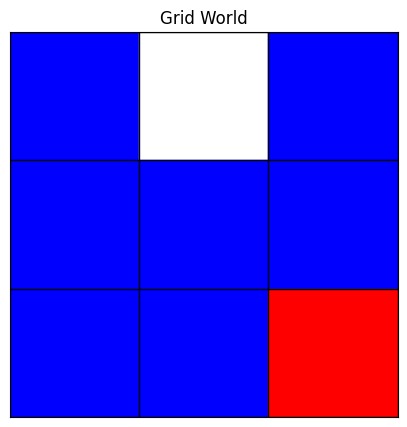

Action: 1, Reward: -0.1, Done: False


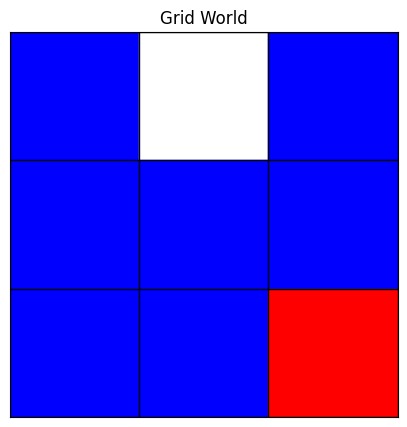

Action: 2, Reward: -0.1, Done: False


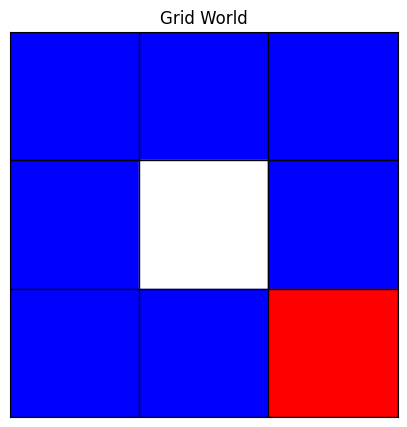

Action: 3, Reward: -0.1, Done: False


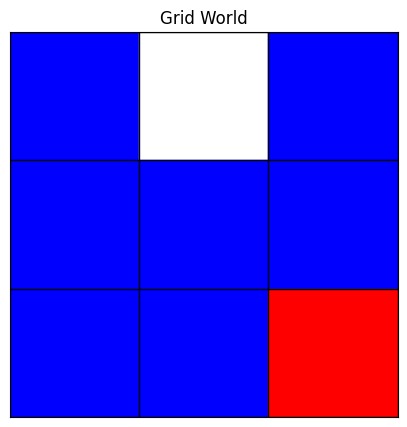

Action: 2, Reward: -0.1, Done: False


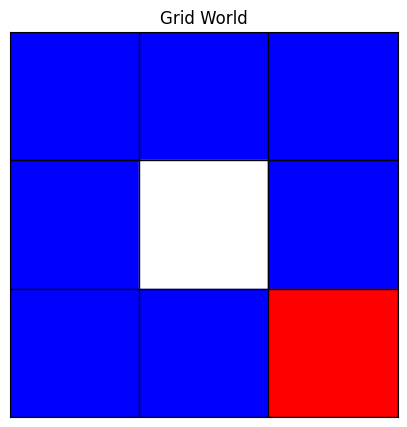

Action: 3, Reward: -0.1, Done: False


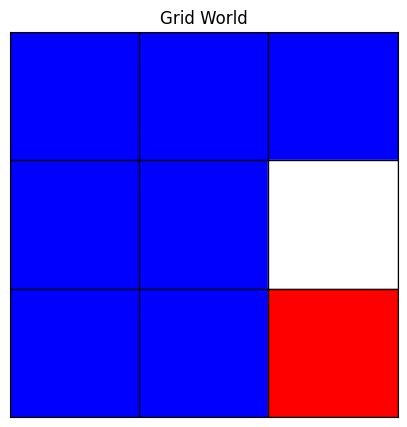

Action: 1, Reward: -0.1, Done: False


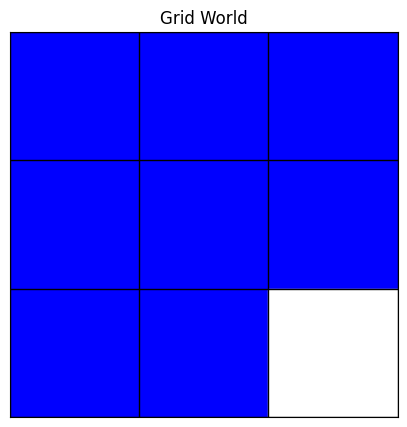

Action: 3, Reward: 1, Done: True


In [ ]:
import random

env = GridWorldEnv(size=3)
obs = env.reset()
done = False

print("🚀 Random Action Agent Starts!")
while not done:
    action = random.choice([0, 1, 2, 3])
    obs, reward, done = env.step(action)
    env.render()
    print(f"Action: {action}, Reward: {reward}, Done: {done}")
    time.sleep(0.5)  # Wait for visualization


## **Setup**
Run the following skeleton code to set up the necessary imports and plotting functions.

In [4]:
import gym
import gym_minigrid
import os
import matplotlib.pyplot as plt
import imageio
#!pip install numpy==1.23.5
import numpy as np
from IPython.display import Image


## **Understanding the Gym MiniGrid Environment**
In this section, we will initialize a MiniGrid environment and explore its key properties.

***What is MiniGrid?***

MiniGrid is a lightweight grid world environment designed for reinforcement learning. The agent interacts with the environment by taking actions, receiving observations, and collecting rewards. It serves as an ideal testing ground for developing and evaluating reinforcement learning algorithms.

Simply execute this cell to retrieve key information about the environment.

In [ ]:
# setup Environment
env = gym.make("MiniGrid-Empty-8x8-v0")

obs, info = env.reset()

# environment information
print("Action Space:", env.action_space)
print("Observation Keys:", obs.keys())
print("Observation Shape:", obs['image'].shape)

Action Space: Discrete(7)
Observation Keys: dict_keys(['image', 'direction', 'mission'])
Observation Shape: (7, 7, 3)


## **Implementing a Random Agent in MiniGrid**
In this section, you will implement a random agent in the MiniGrid environment. This exercise will help you understand how the agent interacts with the environment by taking actions, receiving rewards, and updating the environment state.

🎯 How to Get 5 Points?  
 1️⃣ Successfully execute the following code.  
 2️⃣ The random agent should move freely in the environment.  
 3️⃣ The animation of the agent’s movement should be generated.  
 4️⃣ The total accumulated reward should be displayed.  
 5️⃣ If everything works correctly, congratulations! You earned 5 points! 🎉  


/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Total Reward: -2.97265625


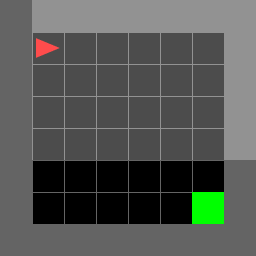

In [ ]:
frames = []  # Stores frames for animation

done = False
total_reward = 0  # Tracks total accumulated reward

while not done:
    # TODO: Select an action randomly
    action = env.action_space.sample()
    # TODO: Take a step in the environment
    obs, reward, done, truncated, _ = env.step(action)
    # TODO: Update the total reward
    total_reward += reward
    frame = env.get_frame()
    frames.append(frame)

print("Total Reward:", total_reward)

# Do not modify the follwing code—any changes will result in a score of **0** for this cell.
gif_path = "/content/minigrid.gif"
imageio.mimsave(gif_path, frames, fps=5)

from IPython.display import Image
Image(filename=gif_path)


Simply execute this cell to explore the available actions that an agent can take in the MiniGrid environment. Understanding these actions will help you better navigate and interact with the environment.

In [ ]:
actions = {i: env.actions(i).name for i in range(env.action_space.n)}
print("Available Actions:", actions)

Available Actions: {0: 'left', 1: 'right', 2: 'forward', 3: 'pickup', 4: 'drop', 5: 'toggle', 6: 'done'}


## **Implementing a Rule-Based Agent in MiniGrid**
In this section, you will implement a **simple rule-based agent** to navigate the **MiniGrid environment**. This will help you gain a deeper understanding of **observations**, **actions**, and **rewards** before progressing to **reinforcement learning**.

🎯 How to Get 5 Points?  
 1️⃣ Successfully execute the following code.  
 2️⃣ The rule-based agent should move based on rule in the environment.  
 3️⃣ The animation of the agent’s movement should be generated.  
 4️⃣ The total accumulated reward should be displayed.  
 5️⃣ If everything works correctly, congratulations! You earned 5 points! 🎉  

Total Reward: 0.915625


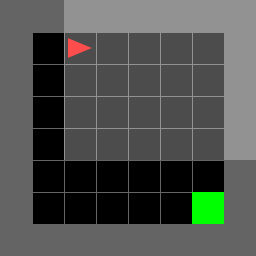

In [ ]:
def rule_based_agent(obs):
    """
    ✅ Simple Rule-Based Agent:
    - **Reads the cell in front of the agent**
    - **Turns if a wall is ahead**
    - **Moves forward if the goal is ahead**
    """
    goal_id, wall_id, agent_id = 8, 2, 1
    # TODO: Retrieve the agent's current facing direction
    direction = obs['direction']
    #print(direction)
    # TODO: Find the agent's position within the observation grid
    agent_pos = env.agent_pos # for testing, we should only get information from observation.




    #print(agent_pos)
    # TODO: Extract the agent's coordinates
    agent_x, agent_y = agent_pos

    # TODO: Calculate the coordinates of the cell directly in front of the agent based on its direction
    if direction == 0:
        front_x, front_y = agent_x + 1, agent_y
    elif direction == 1:
        front_x, front_y = agent_x , agent_y + 1
    elif direction == 2:
        front_x, front_y = agent_x - 1, agent_y
    elif direction == 3:
        front_x, front_y = agent_x, agent_y - 1
    # TODO: Ensure `front_x, front_y` remains within valid grid boundaries
    # Treat any out-of-bounds position as a wall
    action = 2
    front_id = 0
    if front_x <= 0 or front_x >= obs['image'].shape[0] or front_y <= 0 or front_y >= obs['image'].shape[1]:
        front_id = wall_id

    # TODO: Implement decision-making logic
    if front_id == wall_id:
        action = 0
    else:
        action = 2
    return action

done = False
total_reward = 0
frames = []
obs, info = env.reset()


while not done:
    action = rule_based_agent(obs)  # 🔥 Execute the rule-based policy
    #print(action)
    obs, reward, done, truncated, _ = env.step(action)
    total_reward += reward
    frame = env.get_frame()
    frames.append(frame)

    #break

# Do not modify the follwing code—any changes will result in a score of **0** for this cell.
print("Total Reward:", total_reward)

gif_path = "/content/minigrid.gif"
imageio.mimsave(gif_path, frames, fps=5)

Image(filename=gif_path)


# **Question 2: Reinforcement Learning with Tabular Methods**

In this section, we will explore **reinforcement learning (RL)** by implementing tabular-based **value learning** and **policy learning** in MiniGrid environments.

You will investigate two fundamental approaches in reinforcement learning:

## **📌 Value-Based Learning (Q-Learning)**
- Uses a **Q-table** to store action-value estimates for each state.
- The agent **updates Q-values** based on rewards received from the environment.
- Helps the agent **learn an optimal policy** by maximizing future rewards.

## **📌 Policy-Based Learning**
- Instead of learning a Q-table, it **learns a direct policy** (i.e., a mapping from states to actions).
- Can be implemented using **tabular-based policy iteration**.
- Helps understand how an agent can **directly optimize its behavior** without relying on Q-values.


## **Value-Based Learning (Q-Learning)**  

- Uses **Q-tables** to store action values for each state.  
- Applies the **Bellman equation** to update Q-values.  
- Implements **ε-greedy exploration** to balance exploration and exploitation.  


 🎯 How to Get 10 Points?  
 1️⃣ Successfully implement Q-learning to train an agent.  
 2️⃣ The agent should learn to navigate the environment using **Q-tables**.(7 points)

 3️⃣ The agent must reach the goal efficiently after training.  
 4️⃣ An animation showing the trained agent reaching the goal should be generated.  (3 points)

 5️⃣ If everything works correctly, congratulations! You earned 10 points! 🎉  


In [ ]:
def tabular_q_learning(env_name="MiniGrid-Empty-8x8-v0", episodes=5000, alpha=0.1, gamma=0.99,
                       epsilon_start=1.0, epsilon_end=0.1, decay_rate=0.999):
    """
    ✅ Implementing Tabular Q-Learning with Epsilon Decay
    - Uses a **Q-table** to store action values for each state.
    - Updates Q-values using the **Bellman equation**.
    - Implements **ε-greedy exploration** for action selection.
    """
    env = gym.make(env_name)
    # TODO: Initialize an empty Q-table to store state-action values.
    q_table = {}

    rewards_per_episode = []
    # TODO: Initialize epsilon for the exploration-exploitation tradeoff.
    epsilon = epsilon_start

    def get_state(env):
        """✅ Extracts the state representation from the MiniGrid environment."""
        # TODO: Represent the state using the agent's position and direction.
        agent_pos = env.agent_pos
        direction = env.agent_dir
        return (agent_pos[0],agent_pos[1], direction)
        #return (agent_pos, direction)

    for episode in range(episodes):
        # TODO: Reset the environment at the beginning of each episode.
        obs, info = env.reset()
        state = get_state(env)
        done = False
        total_reward = 0

        while not done:
            # TODO: Initialize the state in the Q-table if it is not already present.
            if state not in q_table:
                q_table[state] = np.zeros(env.action_space.n)

            # TODO: Implement an ε-greedy policy for action selection.
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(q_table[state])  # Exploit


            # TODO: Execute the action and observe the next state and reward.
            obs, reward, done, truncated, _ = env.step(action)
            next_state = get_state(env)
            total_reward += reward

            # TODO: Initialize next_state in the Q-table if it is not already present.
            if next_state not in q_table:
                q_table[next_state] = np.zeros(env.action_space.n)


            # TODO: Apply the Q-learning update rule (Bellman equation).
            q_table[state][action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state][action])


            # TODO: Update the state to the next state.
            state = next_state


        rewards_per_episode.append(total_reward)

        # TODO: Decay epsilon over time to gradually reduce exploration.
        epsilon = max(epsilon_end, epsilon * decay_rate)


        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(rewards_per_episode[-100:])
            print(f"Episode {episode + 1}/{episodes}, Avg Reward: {avg_reward:.4f}, Epsilon: {epsilon:.3f}")

    env.close()
    return q_table, rewards_per_episode

Train the agent in **MiniGrid-Empty-8x8**.  

⚠️ **You can only adjust the episodes in this cell**—any others changes will result in a score of **0** for your training code above.


Episode 100/500, Avg Reward: -0.3922, Epsilon: 0.905
Episode 200/500, Avg Reward: 0.5966, Epsilon: 0.819
Episode 300/500, Avg Reward: 0.7627, Epsilon: 0.741
Episode 400/500, Avg Reward: 0.8178, Epsilon: 0.670
Episode 500/500, Avg Reward: 0.8754, Epsilon: 0.606


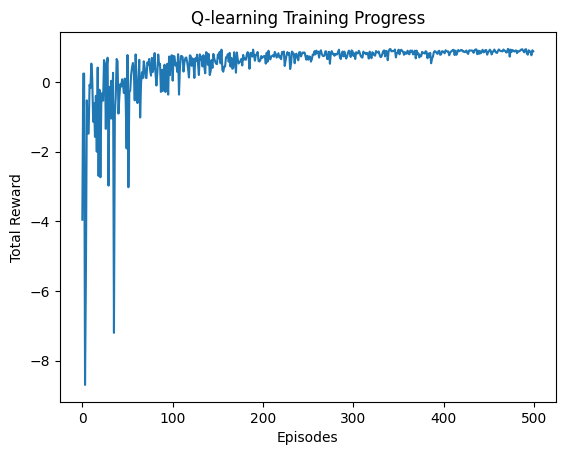

In [ ]:
q_table, rewards = tabular_q_learning("MiniGrid-Empty-8x8-v0", episodes = 500)

plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Q-learning Training Progress")
plt.show()

After training the agent using **Q-learning**, we will now evaluate its performance in the environment.  

This function runs a **single test episode** using the learned **Q-table** and records the agent's movement as a **GIF**.


In [65]:
def run_learned_value(env_name, q_table, max_steps = 100, gif_path="/content/minigrid_q_learning.gif"):
    """
    ✅ Runs a learned Q-table policy in a MiniGrid environment and saves an animation as a GIF.
    :param env_name: (str) Gym environment name.
    :param q_table: (dict) Trained Q-table.
    :param max_steps: (int) Maximum number of steps in the episode.
    :param gif_path: (str) Path to save the generated GIF.
    """
    env = gym.make(env_name, render_mode="rgb_array")
    obs, _ = env.reset()
    # TODO: Retrieve the initial state (agent's position and direction).
    def get_pos(env):
        door_pos = None
        key_pos = None
        end_pos = None
        for grid, obj in enumerate(env.grid.grid):
          if isinstance(obj, gym_minigrid.minigrid.Door):
            door_obj = obj
            #print(id(door_obj), id(obj))
            door_pos = (grid % env.width, grid // env.width)
          elif isinstance(obj, gym_minigrid.minigrid.Key):
              key_pos = (grid % env.width, grid // env.width)
          elif isinstance(obj, gym_minigrid.minigrid.Goal):
              end_pos = (grid % env.width, grid // env.width)
        return key_pos, door_pos, end_pos

    def get_shaped_state(env, prev_door_open, key_pos, door_pos, end_pos, temp_reached):
        """✅ Extract the agent's state (position, direction, key possession, and door status)."""
        # TODO: Represent the state using agent position, direction, key possession, and door status.
        agent_pos = (env.agent_pos[0], env.agent_pos[1])  # (row, col)
        agent_dir = env.agent_dir  # 0=right, 1=down, 2=left, 3=up
        has_key = int(env.carrying is not None and env.carrying.type == "key")
        door_open = prev_door_open
        #get coordinates of key, door and endpoint and return one of it as target pos
        target_pos = None

        for grid, obj in enumerate(env.grid.grid):
          if isinstance(obj, gym_minigrid.minigrid.Door):
            if obj.is_open:
              door_open = 1
              break
        #if door_obj is not None and door_obj.is_open:
        #  door_open = 1

        if temp_reached:
          target_pos = end_pos
        elif door_open:
          #target_pos = (door_pos[0]+1, door_pos[1])
          target_pos = end_pos
        elif has_key:
          target_pos = door_pos
        else:
          target_pos = key_pos

        #vector_x = 1 if (target_pos[0] - agent_pos[0]) > 0 else -1 if (target_pos[0] - agent_pos[0]) < 0 else 0
        #vector_y = 1 if (target_pos[1] - agent_pos[1]) > 0 else -1 if (target_pos[1] - agent_pos[1]) < 0 else 0

        vector_x = target_pos[0] - agent_pos[0]
        vector_y = target_pos[1] - agent_pos[1]

        return (agent_dir ,has_key, door_open, vector_x, vector_y)

    def get_state(env):
        """✅ Extracts the state representation from the MiniGrid environment."""
        # TODO: Represent the state using the agent's position and direction.
        agent_pos = env.agent_pos
        direction = env.agent_dir
        return (agent_pos[0], agent_pos[1], direction)

    if env_name == "MiniGrid-Empty-8x8-v0":
      state = get_state(env)
    else:
      key_pos, door_pos, end_pos = get_pos(env)
      temp_reached = 0
      state = get_shaped_state(env, 0, key_pos, door_pos, end_pos, temp_reached)
    random_act = 0


    frames = []
    total_reward = 0  # Tracks the total accumulated reward.

    for i in range(max_steps):
        frames.append(env.get_frame())
        # TODO: Select an action based on the learned Q-table.
        if not random_act:
          action = np.argmax(q_table[state])
        else:
          action = np.random.randint(1, 3)
        print('action: ',action)

        # Execute the chosen action and observe the outcome.
        obs, reward, done, truncated, _ = env.step(action)
        total_reward += reward  # Update the total reward.
        # TODO: Update the agent's state.
        if env_name == "MiniGrid-Empty-8x8-v0":
          next_state = get_state(env)
        else:
          key_pos, door_pos, end_pos = get_pos(env)
          if ((env.agent_pos[0], env.agent_pos[1]) == (door_pos[0]+1, door_pos[1])):
            temp_reached = 0
          next_state = get_shaped_state(env, 0, key_pos, door_pos, end_pos, temp_reached)
          if state == next_state or (i >= 20 and i % 20 == 0):
            random_act = 1

        state = next_state
        if done:
            break

    env.close()

# Do not modify the follwing code—any changes will result in a score of **0** for this cell and also your training code above.
    # Save the recorded frames as a GIF.
    imageio.mimsave(gif_path, frames, fps=5)
    print(f"Total Reward: {total_reward}")

    return Image(filename=gif_path)

# ✅ Run the trained agent using the learned value-based policy.
run_learned_value("MiniGrid-Empty-8x8-v0", q_table)

KeyError: (1, 1, 0)

## **Policy-Based Learning**  
- Uses a **policy table** to store action probabilities for each state instead of Q-values.  
- Applies **policy gradient methods** to directly optimize the policy, rather than using the Bellman equation.  
- Uses **softmax action selection**, meaning actions are chosen probabilistically instead of always picking the one with the highest value.  

### **🔑 Key Differences from Value-Based Learning (Q-Learning)**  
| Feature            | Value-Based Learning (Q-Learning) | Policy-Based Learning (Policy Gradient) |
|--------------------|---------------------------------|----------------------------------------|
| **Learning Target** | Learns **Q-values** (action values) | Learns **action probabilities** (policy function) |
| **Action Selection** | Uses **ε-greedy** to choose the best Q-value | Uses **softmax** or a stochastic policy to sample actions |
| **Update Method** | Updates Q-values using the **Bellman equation** | Updates the policy directly using **policy gradients** |
| **Exploration Strategy** | Requires **ε-decay** to balance exploration | Exploration is **inherent** in the policy |
| **Best For** | **Discrete action spaces** (small state spaces) | **Continuous or large action spaces** |

## **📌 Summary**  
- **Q-Learning** learns **what the best action is** by estimating values for each action.  
- **Policy Learning** learns **how to act directly**, optimizing the probability of taking actions.  
- **Policy Learning is better for complex, continuous environments**, while **Value Learning is more efficient in simple, discrete environments**. 🚀


 🎯 How to Get 5 Points?  
 1️⃣ Successfully implement policy learning to train an agent.  
 2️⃣ The agent should learn to navigate the environment using **policy-tables**.  
 3️⃣ The agent must reach the goal efficiently after training. (4 points)
 4️⃣ An animation showing the trained agent reaching the goal should be generated. (1 points)  
 5️⃣ If everything works correctly, congratulations! You earned 5 points! 🎉  

In [ ]:
import math

def tabular_policy_learning(env_name="MiniGrid-Empty-8x8-v0", episodes=5000, alpha=0.1, gamma=0.99):
    """
    ✅ Implementing Tabular Policy Learning using Softmax Policy
    - Uses a **policy table** to store action probabilities for each state.
    - Updates policy using a **policy gradient** (REINFORCE-like update).
    - Uses **softmax action selection** for exploration.
    """
    env = gym.make(env_name)
    # TODO: Initialize an empty policy table to store action probabilities.
    policy_table = {}

    rewards_per_episode = []

    def get_state(env):
        """✅ Extracts the state representation from the MiniGrid environment."""
        agent_pos = tuple(env.agent_pos)
        direction = env.agent_dir
        return (agent_pos[0], agent_pos[1], direction)

    def softmax(x):
        """✅ Compute softmax values for an array."""
        exp_x = np.exp(x - np.max(x))  # Numeric stability
        return exp_x / exp_x.sum()

    for episode in range(episodes):
        obs, _ = env.reset()
        state = get_state(env)
        done = False
        total_reward = 0
        trajectory = []  # Store (state, action, reward) for policy update

        #env.action_space.
        while not done:
            # TODO: Initialize the state in the policy table if it is not already present.
            if state not in policy_table:
                policy_table[state] = np.ones(env.action_space.n)
                policy_table[state][2] = 4.0 #moving is the one that can accully make progress

            # TODO: Select action using the softmax policy.
            action_probs = softmax(policy_table[state]) # Compute softmax over action probabilities
            action = np.random.choice(env.action_space.n, p=action_probs)

            # TODO: Execute the action and observe the next state and reward.
            obs, reward, done, truncated, _ = env.step(action)
            next_state = get_state(env)
            total_reward += reward
            # TODO: Initialize next_state in the policy table if it is not already present.(deprecated)

            # Store transition for policy update
            trajectory.append((state, action, reward))

            # Update state
            state = next_state

        rewards_per_episode.append(total_reward)

        #print('size', len(trajectory))

        # ✅ **Policy Update (REINFORCE-like)**
        G = 0  # Return (discounted sum of rewards)
        for t in reversed(range(len(trajectory))):
            state, action, reward = trajectory[t]
            G = reward + gamma * G  # Discounted reward
            # TODO: Update policy table using policy gradient
            action_probs = softmax(policy_table[state])
            policy_table[state][action] += alpha * G * (1 - action_probs[action])

        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(rewards_per_episode[-100:])
            print(f"Episode {episode + 1}/{episodes}, Avg Reward: {avg_reward:.4f}")

    env.close()
    return policy_table, rewards_per_episode


Train the agent in **MiniGrid-Empty-8x8** using **policy learning**.  

⚠️ **You can only adjust the episodes in this cell**—any others changes will result in a score of **0** for your training code above.

In [ ]:
# ✅ Train the agent using policy-based learning.
policy_table, rewards = tabular_policy_learning("MiniGrid-Empty-8x8-v0", episodes=3000)

plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Tabular Policy Learning Training Progress")
plt.show()

size 54
size 12
size 137
size 122
size 31
size 30
size 84
size 25
size 30
size 38
size 184
size 69
size 68
size 161
size 83
size 56
size 317
size 37
size 45
size 460
size 352
size 166
size 106
size 52
size 138
size 52
size 83
size 149
size 92
size 182
size 49
size 120
size 33
size 146
size 64
size 148
size 67
size 337
size 49
size 41
size 106
size 101
size 148
size 78
size 159
size 165
size 33
size 64
size 221
size 479
size 71
size 395
size 184
size 532
size 38
size 30
size 117
size 269
size 156
size 383
size 231
size 70
size 89
size 42
size 304
size 71
size 166
size 268
size 21
size 55
size 17
size 79
size 130
size 370
size 67
size 46
size 197
size 47
size 24
size 39
size 211
size 39
size 411
size 85
size 200
size 84
size 29
size 113
size 15
size 80
size 135
size 85
size 13
size 105
size 131
size 209
size 212
size 52
size 22
size 36
Episode 100/3000, Avg Reward: 0.5501
size 37
size 166
size 85
size 107
size 29
size 125
size 31
size 23
size 31
size 92
size 36
size 79
size 35
size 41
si

KeyboardInterrupt: 

Now that you have trained your agent using **tabular policy learning**, let's visualize its performance in the **MiniGrid environment**.  

This function runs a **test episode** using the learned **policy table (π-table)** and records the agent's movement as a **GIF**.


In [ ]:
def run_learned_policy(env_name, policy_table, max_steps = 100, gif_path="/content/minigrid_policy_learning.gif"):
    """
    ✅ Runs a learned policy in a MiniGrid environment and saves an animation GIF.
    """
    def get_state(env):
        """✅ Extracts the state representation from the MiniGrid environment."""
        agent_pos = tuple(env.agent_pos)
        direction = env.agent_dir
        return (agent_pos[0], agent_pos[1], direction)

    def softmax(x):
        """✅ Compute softmax values for an array."""
        exp_x = np.exp(x - np.max(x))  # Numeric stability
        return exp_x / exp_x.sum()

    env = gym.make(env_name, render_mode="rgb_array")
    obs, _ = env.reset()
    state = get_state(env)

    frames = []
    total_reward = 0  # Track total accumulated reward

    for _ in range(max_steps):
        frames.append(env.get_frame())

        # TODO: Choose an action using the learned policy table
        #if state not in policy_table:
        #  policy_table[state] = np.ones(env.action_space.n)

        #action_probs = softmax(policy_table[state]
        action = np.argmax(policy_table[state])

        obs, reward, done, truncated, _ = env.step(action)
        total_reward += reward  # Update total reward
        state = get_state(env)

        if done:
            break

    env.close()

# Do not modify the follwing code—any changes will result in a score of **0** for this cell and also your training code above.
    imageio.mimsave(gif_path, frames, fps=5)
    print(f"Total Reward: {total_reward}")


    return Image(filename=gif_path)

# ✅ Run the trained policy
run_learned_policy("MiniGrid-Empty-8x8-v0", policy_table)


NameError: name 'policy_table' is not defined

In this section, you will train an agent using **Q-learning** in the **MiniGrid-DoorKey-8x8-v0** environment.  

However, you will likely find that the agent **fails to learn efficiently** in this more complex environment.  

You can comment out the training code to avoid retraining the agent every time you run this notebook.


In [ ]:
#q_table, rewards = tabular_q_learning("MiniGrid-DoorKey-8x8-v0", episodes=10000, epsilon_start=1.0, epsilon_end=0.1, decay_rate=0.9995)

Now that we have trained an agent using **Q-learning** on **MiniGrid-DoorKey-8x8-v0**, let's evaluate its performance.

You can also comment out this cell.

In [ ]:
# ✅ Run the trained value once
#run_learned_value("MiniGrid-DoorKey-8x8-v0", q_table)

## **Reward Shaping**  

If the agent only receives a reward upon reaching the goal, how can it learn that **picking up the key** and **opening the door** are necessary steps?  

This is where **Reward Shaping** comes into play.  

### **📌 What is Reward Shaping?**  
Reward shaping is a technique used in **reinforcement learning (RL)** to provide additional rewards that help guide the agent toward desirable behaviors. Instead of giving a reward only when the agent completes the task, intermediate rewards are introduced to **reinforce progress** toward the goal.  

### **🛠 Why Use Reward Shaping?**  
- **Speeds up learning**: Helps the agent learn useful behaviors more quickly.  
- **Encourages exploration**: Provides incentives for discovering key steps in complex environments.  
- **Reduces sparse reward problems**: Addresses situations where rewards are given only at the end of an episode, making learning difficult.  

### **🎯 Example: Reward Shaping in MiniGrid-DoorKey**  
In **MiniGrid-DoorKey-8x8-v0**, the agent must:  
1. **Find and pick up the key**  
2. **Navigate to the locked door**  
3. **Unlock and pass through the door**  
4. **Reach the goal to receive the final reward**  

Without reward shaping, the agent may struggle to associate picking up the key with reaching the goal.

### **🚀 Key Takeaway**  
Reward shaping **bridges the gap between sparse rewards and effective learning**. It guides the agent by providing structured feedback, helping it navigate complex tasks more efficiently.

🎯 How to Get 15 Points?  
 1️⃣ Successfully implement reward-shaping to train an agent.  
 2️⃣ The agent should learn to navigate the environment using **Q-tables**.

 3️⃣ The agent must reach the goal efficiently after training.  
 4️⃣ An animation showing the trained agent reaching the goal should be generated.  (15 points)

 5️⃣ If everything works correctly, congratulations! You earned 10 points! 🎉  


In [8]:
from pickle import TRUE
import matplotlib.image as img
from time import sleep
def tabular_q_learning_adjust(env_name="MiniGrid-DoorKey-5x5-v0", episodes=10000, alpha=0.1, gamma=0.99,
                              epsilon_start=1.0, epsilon_end=0.1, decay_rate=0.9999, reward_shaping=True,
                              q_table=None, debug=False):
    """
    ✅ Implement Tabular Q-learning with Reward Shaping
    - Modify reward shaping to accelerate learning.
    - Adjust epsilon decay to ensure sufficient exploration.
    - Ensure the agent learns the full sequence: "pick up key → open door → reach goal".
    """
    env = gym.make(env_name,)

    if q_table is None:
        q_table = {}

    rewards_per_episode = []
    steps_per_episode = [] #for validation
    key_per_episode = [] #for validation
    door_per_episode = [] #for validation
    temp_reach_per_episode = []
    epsilon = epsilon_start
    door_obj = None

    def get_pos(env):
        door_pos = None
        key_pos = None
        end_pos = None
        for grid, obj in enumerate(env.grid.grid):
          if isinstance(obj, gym_minigrid.minigrid.Door):
            door_obj = obj
            #print(id(door_obj), id(obj))
            door_pos = (grid % env.width, grid // env.width)
          elif isinstance(obj, gym_minigrid.minigrid.Key):
              key_pos = (grid % env.width, grid // env.width)
          elif isinstance(obj, gym_minigrid.minigrid.Goal):
              end_pos = (grid % env.width, grid // env.width)
        return key_pos, door_pos, end_pos

    def get_state(env, prev_door_open, key_pos, door_pos, end_pos):
        """✅ Extract the agent's state (position, direction, key possession, and door status)."""
        # TODO: Represent the state using agent position, direction, key possession, and door status.
        agent_pos = (env.agent_pos[0], env.agent_pos[1])  # (row, col)
        agent_dir = env.agent_dir  # 0=right, 1=down, 2=left, 3=up
        has_key = int(env.carrying is not None and env.carrying.type == "key")
        door_open = prev_door_open
        #get coordinates of key, door and endpoint and return one of it as target pos
        target_pos = None
        for grid, obj in enumerate(env.grid.grid):
          if isinstance(obj, gym_minigrid.minigrid.Door) and obj.is_open:
            door_open = 1
            break

        if door_open:
          target_pos = end_pos
        elif has_key:
          target_pos = door_pos
        else:
          target_pos = key_pos
        #vector_x = 1 if (target_pos[0] - agent_pos[0]) > 0 else -1 if (target_pos[0] - agent_pos[0]) < 0 else 0
        #vector_y = 1 if (target_pos[1] - agent_pos[1]) > 0 else -1 if (target_pos[1] - agent_pos[1]) < 0 else 0
        vector_x = target_pos[0] - agent_pos[0]
        vector_y = target_pos[1] - agent_pos[1]
        return (agent_dir ,has_key, door_open, vector_x, vector_y)

    for episode in range(episodes):
        obs, _ = env.reset()
        door_obj = None #reset the door
        keyPos, doorPos, endPos = get_pos(env)
        temp_point = (doorPos[0]+1, doorPos[1])
        temp_point_reached = 0

        '''
        print(doorPos, keyPos, temp_point)
        plt.imshow(env.get_frame())
        plt.show()
        '''

        state = get_state(env, False, keyPos, doorPos, endPos)  # Initially, the door is closed.
        done = False
        total_reward = 0
        prev_has_key = 0
        prev_door_open = 0
        episode_step = 0

        while not done:
            # TODO: Initialize the state in the Q-table if not already present.
            if state not in q_table:
              q_table[state] = np.zeros(env.action_space.n)
              q_table[state][4] = -100000 #drop is unnecessary

            # TODO: Implement ε-greedy policy for action selection.
            if np.random.rand() < epsilon:
              action = env.action_space.sample()  # Random action
            else:
              action = np.argmax(q_table[state])  # Best action from Q-table

            # Execute the selected action.
            prev_carrying = env.carrying
            obs, reward, done, truncated, _ = env.step(action)

            next_state = get_state(env, prev_door_open, keyPos, doorPos, endPos)
            episode_step += 1

            # ✅ TODO: Implement reward shaping.
            shaped_reward = 0

            hasKey = next_state[1]
            doorOpen = next_state[2]

            shaped_reward -= 0.1

            if not prev_has_key and hasKey:
              shaped_reward += 200
              key_per_episode.append(episode_step)
              prev_has_key = True

            if not prev_door_open and doorOpen:
              shaped_reward += 500
              door_per_episode.append(episode_step)
              prev_door_open = True

            if (env.agent_pos[0], env.agent_pos[1]) == (doorPos[0]+1, doorPos[1]):
              shaped_reward += 700
              temp_point_reached = 1
              temp_reach_per_episode.append(episode_step)

            if done:
              shaped_reward += 1000

            #some speed up?
            if action == 4:
              shaped_reward -= 5


            # Update total reward.
            reward += shaped_reward
            total_reward += reward
            # TODO: Initialize the next state in the Q-table if not already present.
            if next_state not in q_table:
              q_table[next_state] = np.zeros(env.action_space.n)
              q_table[state][4] = -100000 #drop is unnecessary
            # TODO: Apply Q-learning update rule (Bellman equation).

            q_table[state][action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state][action])
            # Move to the next state.
            state = next_state

        rewards_per_episode.append(total_reward)
        steps_per_episode.append(episode_step)
        epsilon = max(epsilon_end, epsilon * decay_rate)

        n = 50

        if (episode + 1) % n == 0:
            avg_reward = np.mean(rewards_per_episode[-n:])
            avg_step = np.mean(steps_per_episode[-n:])
            avg_key_step = np.mean(key_per_episode[-n:])
            avg_door_step = np.mean(door_per_episode[-n:])
            avg_temp_step = np.mean(temp_reach_per_episode[-n:])
            print(f"🚀 Episode {episode + 1}/{episodes}, Average Reward: {avg_reward:.2f}, Epsilon: {epsilon:.3f}")
            print(f"🚀Average Steps: {avg_step:.2f}")
            print(f"🚀Average key steps: {avg_key_step:.2f}")
            print(f"🚀Average door steps: {avg_door_step:.2f}")
            #print(f"🚀Average temp steps: {avg_temp_step:.2f}")

    print(steps_per_episode[-50:])
    print(door_per_episode[-50:])

    env.close()
    return q_table, rewards_per_episode




Training with reward shapping in the MiniGrid-DoorKey Environment.

⚠️ **You can only adjust the episodes in this cell**—any others changes will result in a score of **0** for your training code above.

In [9]:
# ✅ Run the training.
print("🚀 Training MiniGrid-DoorKey-8x8-v0")
q_table, rewards = tabular_q_learning_adjust("MiniGrid-DoorKey-8x8-v0", episodes = 12000)
plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Reward Shaping Training Progress")
plt.show()

🚀 Training MiniGrid-DoorKey-8x8-v0


NameNotFound: Environment MiniGrid-DoorKey-8x8 doesn't exist. 

Now that you have trained your agent using reward shaping, let's visualize its performance in the **MiniGrid-DoorKey Environment**.  
⚠️ Do not modify this cell—any changes will result in a score of 0 for your training code above.

action:  2
action:  2
action:  2
action:  2
action:  1
action:  2
action:  1
action:  2
action:  1
action:  2
action:  1
action:  2
action:  1
action:  2
action:  2
action:  2
action:  1
action:  2
action:  2
action:  2
action:  1
action:  1
action:  1
action:  2
action:  1
action:  2
action:  2
action:  2
action:  2
action:  1
action:  2
action:  2
action:  1
action:  1
action:  1
action:  2
action:  2
action:  2
action:  2
action:  1
action:  2
action:  2
action:  1
action:  2
action:  1
action:  1
action:  2
action:  2
action:  1
action:  2
action:  2
action:  1
action:  2
action:  1
action:  2
action:  2
action:  1
action:  1
action:  2
action:  2
action:  2
action:  2
action:  2
action:  2
action:  1
action:  2
action:  2
action:  2
action:  1
action:  2
action:  1
action:  1
action:  1
action:  1
action:  2
action:  1
action:  2
action:  2
action:  2
action:  2
action:  2
action:  2
action:  1
action:  2
action:  2
action:  1
action:  1
action:  1
action:  2
action:  2
action:  2

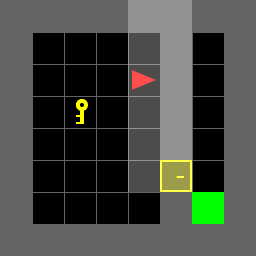

In [67]:
run_learned_value("MiniGrid-DoorKey-8x8-v0", q_table)

In [39]:
success_cnt = 0
for i in range(100):
  _, done = run_learned_value("MiniGrid-DoorKey-8x8-v0", q_table)
  if done:
    success_cnt += 1
print(success_cnt)

action:  3
action:  0
action:  0
action:  2
action:  2
action:  1
action:  5


KeyError: (0, 1, 1, 2, 5, False)

# **Question 3: Implementing Tabular Learning with PyTorch**  

So far, we have implemented **Tabular Q-learning** using **NumPy** to store and update the Q-table.  
However, in real-world **reinforcement learning**, deep learning frameworks like **PyTorch** are often used to handle **large state spaces** and optimize learning.  

In this question, we will still use **tabular learning**, but instead of **NumPy**, we will implement **Q-learning** and **Policy Learning** using **PyTorch**.  


✅ **Q-Learning Implementation (10 Points)**  
- Correctly implements **Q-learning using PyTorch tensors** instead of NumPy.  
- Successfully **trains the agent** and **demonstrates an animation of reaching the goal**.  

✅ **Policy Learning Implementation (10 Points)**  
- Correctly implements **policy-based learning using PyTorch**, including a **softmax policy**.  
- Successfully **trains the agent** and **demonstrates an animation of reaching the goal**.  

🚀 **Full Score (20 Points)**: If both Q-learning and Policy Learning are implemented correctly and the agent **successfully reaches the goal**, you have **earned all 20 points! 🎉**  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

def get_agent_state(env):
    """
    ✅ Extract the agent's state as (x, y) position and direction.
    """
    x, y = env.agent_pos  # Directly retrieve the agent's position.
    direction = env.agent_dir  # Retrieve the agent's current direction.
    return (x, y, direction)  # Return state as (x, y, direction).

class PyTorchQTable:
    def __init__(self, state_size, action_size, lr=0.1):
        """
        ✅ PyTorch Q-table Implementation.
        - Stores Q-values as a PyTorch tensor.
        - Uses gradient-based updates instead of direct assignment.
        - Optimizes learning using **Mean Squared Error (MSE)**.
        """
        self.state_size = state_size
        self.action_size = action_size

        # ✅ TODO: Initialize the Q-table as a PyTorch tensor.
        self.q_table = nn.Parameter(torch.zeros(state_size + (action_size,), dtype=torch.float32, requires_grad=True))

        # ✅ TODO: Use **Stochastic Gradient Descent (SGD)** or **Adam** for optimization.
        self.optimizer = optim.SGD([self.q_table], lr=lr)

        # ✅ TODO: Use **Mean Squared Error (MSE) loss** for training.
        self.criterion = nn.MSELoss()


    def update(self, state, action, target):
        """
        ✅ Update the Q-value using PyTorch optimization.
        """
        self.optimizer.zero_grad()

        # ✅ TODO: Retrieve the current Q-value.
        current_q_value = self.q_table[state][action]

        # ✅ TODO: Compute the **MSE loss**.
        target = torch.tensor(target, dtype=torch.float32)  # Convert target to tensor.
        loss = self.criterion(current_q_value, target)

        # ✅ TODO: Perform **backpropagation**.
        loss.backward()

        # ✅ TODO: Perform **gradient descent**.
        self.optimizer.step()

    def get_action(self, state, epsilon):
        """
        ✅ Implements **ε-greedy action selection**.
        """
        if np.random.rand() < epsilon:
            return np.random.choice(self.action_size)  # Explore.
        else:
            return torch.argmax(self.q_table[state]).item()  # Exploit.



def train_pytorch_q_learning(env_name="MiniGrid-Empty-8x8-v0", episodes=5000, alpha=0.1, gamma=0.99,
                             epsilon_start=1.0, epsilon_end=0.1, decay_rate=0.9995):
    """
    ✅ Train a Q-learning agent using **PyTorch tensors**.
    """
    env = gym.make(env_name)
    state_size = (env.width, env.height, 4)  # (x, y, direction).
    action_size = env.action_space.n

    q_table = PyTorchQTable(state_size, action_size, lr=alpha)
    epsilon = epsilon_start

    for episode in range(episodes):
        obs, _ = env.reset()

        # Retrieve the agent's state directly from the environment.
        state = get_agent_state(env)

        done = False
        total_reward = 0

        while not done:
        #✅ TODO: Implement Q-learning using PyTorch Q-table.
            action = q_table.get_action(state, epsilon)
            obs, reward, done, truncated, _ = env.step(action)
            total_reward += reward
            next_state = get_agent_state(env)

            # Compute the target Q-value.
            next_q_values = q_table.q_table[next_state].detach()
            target = reward + gamma * torch.max(next_q_values) - q_table.q_table[state][action]

            # Update Q-table.
            q_table.update(state, action, target)

            # Move to the next state.
            state = next_state


        # Decay epsilon over time to reduce exploration.
        epsilon = max(epsilon_end, epsilon * decay_rate)

        # Print progress every 100 episodes.
        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")

    env.close()
    return q_table


Train the agent in MiniGrid-Empty-8x8 with PyTorch Q-learning.

⚠️ **You can only adjust the episodes in this cell**—any others changes will result in a score of **0** for your training code above.

In [ ]:
print("🚀 Training PyTorch Q-learning on MiniGrid-Empty-8x8")
q_table = train_pytorch_q_learning("MiniGrid-Empty-8x8-v0", episodes=5000)

🚀 Training PyTorch Q-learning on MiniGrid-Empty-8x8


KeyboardInterrupt: 

In [ ]:
def run_pytorch_q_learning(env_name="MiniGrid-Empty-8x8-v0", q_table=None, max_steps=100, gif_path="/content/minigrid_q_learning.gif"):
    """
    ✅ Runs a trained PyTorch Q-learning agent and visualizes its performance.
    - Executes a single test episode using the trained **Q-table**.
    - Saves the agent's movement as a **GIF**.

    :param env_name: (str) Name of the MiniGrid environment.
    :param q_table: (PyTorchQTable) Trained Q-table from PyTorch Q-learning.
    :param max_steps: (int) Maximum steps allowed in the episode.
    :param gif_path: (str) File path to save the GIF.
    """
    env = gym.make(env_name, render_mode="rgb_array")
    obs, _ = env.reset()
    state = get_agent_state(env)  # ✅ Retrieve the agent's initial state.

    frames = []
    total_reward = 0

    for _ in range(max_steps):
        frames.append(env.get_frame())  # ✅ Capture the environment frame for visualization.

        # ✅ Select an action using the trained Q-table (exploitation).
        action = q_table.get_action(state, epsilon=0)  # Greedy action selection.

        # ✅ Execute the action in the environment.
        obs, reward, done, truncated, _ = env.step(action)
        total_reward += reward  # ✅ Accumulate total reward.
        state = get_agent_state(env)  # ✅ Update the agent's state.

        if done:
            break  # ✅ Stop if the goal is reached.

    env.close()
# Do not modify the code below—any changes will result in a score of 0 for your training code above.
    # ✅ Save the frames as a GIF to visualize the agent's behavior.
    imageio.mimsave(gif_path, frames, fps=5)
    print(f"Total Reward: {total_reward}")

    return Image(filename=gif_path)

run_pytorch_q_learning("MiniGrid-Empty-8x8-v0", q_table)


NameError: name 'q_table' is not defined

Instead of directly updating **Q-values**, we will now train an explicit **policy** using **Softmax Policy Gradients**.  

### **📌 What is Softmax Policy Gradient?**  
In **value-based reinforcement learning** (e.g., Q-learning), an agent **learns a Q-table** that estimates the value of each action in a given state. However, instead of storing and updating Q-values, **policy-based methods** directly learn a **policy** that maps states to actions.  

The **Softmax Policy Gradient** approach uses a **probabilistic policy representation**, where action selection is based on a **Softmax function** applied to policy scores. This enables the agent to explore actions **proportionally to their estimated effectiveness**, rather than always selecting the highest-value action.  

### **🛠 How Does It Work?**  
1. **The policy is represented by a probability distribution** over actions for each state.  
2. **The agent selects an action using Softmax probabilities**, rather than choosing greedily based on a Q-table.  
3. **The policy is updated using gradient ascent**, optimizing a loss function (e.g., Cross-Entropy Loss).  
4. **The agent improves its action selection strategy over time** by reinforcing actions that lead to higher rewards.  

### **🎯 Why Use Softmax Policy Gradients?**  
- ✅ **Handles large state spaces** more effectively than tabular Q-learning.  
- ✅ **Encourages exploration** by selecting actions probabilistically instead of always taking the best-known action.  
- ✅ **More suitable for stochastic environments**, where actions should not always be deterministic.  
- ✅ **Lays the foundation for deep policy-based RL**, such as REINFORCE and Actor-Critic methods.  

In this section, we will implement **policy learning** using **PyTorch** and train the agent using the **Softmax Policy Gradient method**.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

def get_agent_state(env):
    """
    Extract the agent's state as (x, y) position and direction.
    """
    x, y = env.agent_pos  # Agent's position
    direction = env.agent_dir  # Agent's direction
    return (x, y, direction)  # Return state as (x, y, direction)

class PyTorchPolicyTable:
    def __init__(self, state_size, action_size, lr=0.1):
        """
        Implements a tabular softmax policy using PyTorch.
        - Stores action probabilities in a PyTorch tensor.
        - Uses policy gradient (REINFORCE) for updates.
        """
        self.state_size = state_size
        self.action_size = action_size

        # Initialize the policy table as a learnable tensor

        self.policy_table = nn.Parameter(torch.ones(state_size + (action_size,), dtype=torch.float32, requires_grad=True))
        self.policy_table.data[..., 2] = 4.0


        # Use Adam optimizer for policy optimization
        self.optimizer = optim.Adam([self.policy_table], lr=lr)

    def get_action(self, state):
        """
        Sample an action based on softmax probabilities.
        """
        action_probs = torch.softmax(self.policy_table[state], dim=0)  # Compute softmax over action probabilities
        action = torch.multinomial(action_probs, 1).item()  # Sample action
        return action

    def update(self, trajectory, gamma):
        """
        Update policy using REINFORCE algorithm.
        """
        self.optimizer.zero_grad()
        G = 0  # Initialize return
        for state, action, reward in reversed(trajectory):
            G = reward + gamma * G  # Compute discounted return
            action_probs = torch.log_softmax(self.policy_table[state], dim=0)  # Compute log probabilities
            loss = -action_probs[action] * G  # Policy gradient loss
            loss.backward()  # Backpropagate loss
        self.optimizer.step()  # Update policy table

def train_pytorch_policy_learning(env_name="MiniGrid-Empty-8x8-v0", episodes=5000, alpha=0.1, gamma=0.99):
    """
    Train policy using softmax policy gradient (REINFORCE).
    """
    env = gym.make(env_name)
    state_size = (env.width, env.height, 4)  # (x, y, direction)
    action_size = env.action_space.n
    policy = PyTorchPolicyTable(state_size, action_size, lr=alpha)

    for episode in range(episodes):
        obs, _ = env.reset()
        state = get_agent_state(env)
        done = False
        total_reward = 0
        trajectory = []

        while not done:
            action = policy.get_action(state)
            obs, reward, done, truncated, _ = env.step(action)
            next_state = get_agent_state(env)
            total_reward += reward
            trajectory.append((state, action, reward))
            state = next_state

        #print('episode: ', episode, 'steps', len(trajectory))
        if(len(trajectory) > 256):
          break

        policy.update(trajectory, gamma)  # Update policy

        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}")

    env.close()
    return policy


Train the agent in MiniGrid-Empty-8x8 with PyTorch policy learning.

⚠️ **You can only adjust the episodes in this cell**—any others changes will result in a score of **0** for your training code above.

In [ ]:
print("🚀 Training PyTorch Policy Learning on MiniGrid-Empty-8x8")
policy_model = train_pytorch_policy_learning("MiniGrid-Empty-8x8-v0", episodes=3000)

🚀 Training PyTorch Policy Learning on MiniGrid-Empty-8x8


/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 100/3000, Total Reward: 0.9578125
Episode 200/3000, Total Reward: 0.891015625
Episode 300/3000, Total Reward: 0.92265625
Episode 400/3000, Total Reward: 0.9578125
Episode 500/3000, Total Reward: 0.9578125
Episode 600/3000, Total Reward: 0.961328125
Episode 700/3000, Total Reward: 0.9578125
Episode 800/3000, Total Reward: 0.954296875
Episode 900/3000, Total Reward: 0.961328125
Episode 1000/3000, Total Reward: 0.92265625
Episode 1100/3000, Total Reward: 0.961328125
Episode 1200/3000, Total Reward: 0.961328125
Episode 1300/3000, Total Reward: 0.961328125
Episode 1400/3000, Total Reward: 0.961328125
Episode 1500/3000, Total Reward: 0.961328125
Episode 1600/3000, Total Reward: 0.961328125
Episode 1700/3000, Total Reward: 0.961328125
Episode 1800/3000, Total Reward: 0.9578125
Episode 1900/3000, Total Reward: 0.961328125
Episode 2000/3000, Total Reward: 0.961328125
Episode 2100/3000, Total Reward: 0.961328125
Episode 2200/3000, Total Reward: 0.961328125
Episode 2300/3000, Total Reward

Now that you have trained your agent using **PyTorch policy learning**, let's visualize its performance in the **MiniGrid environment**.  

This function runs a **test episode** using the learned **policy table (π-table)** and records the agent's movement as a **GIF**.

⚠️ Do not modify this cell—any changes will result in a score of 0 for your training code above.


🚀 Running PyTorch Policy Learning agent
Total Reward: 0.961328125


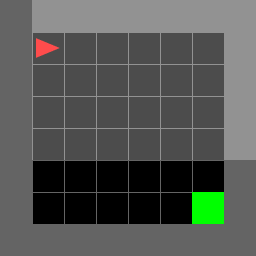

In [ ]:

def run_pytorch_policy_learning(env_name, policy_model, max_steps=100, gif_path="/content/minigrid_policy_learning.gif"):
    """
    ✅ Run a trained PyTorch Policy agent and save a GIF
    """
    env = gym.make(env_name, render_mode="rgb_array")
    obs, _ = env.reset()
    state = (env.agent_pos[0], env.agent_pos[1], env.agent_dir)

    frames = []
    total_reward = 0

    for _ in range(max_steps):
        frames.append(env.get_frame())

        action = policy_model.get_action(state)  # Select action using learned policy
        obs, reward, done, truncated, _ = env.step(action)
        total_reward += reward
        state = (env.agent_pos[0], env.agent_pos[1], env.agent_dir)

        if done:
            break

    env.close()

    # Save GIF
    imageio.mimsave(gif_path, frames, fps=5)
    print(f"Total Reward: {total_reward}")

    # Display GIF
    return Image(filename=gif_path)

# ✅ Run the trained policy agent
print("🚀 Running PyTorch Policy Learning agent")
run_pytorch_policy_learning("MiniGrid-Empty-8x8-v0", policy_model)
